!pip install yfinance

In [1]:
import yfinance as yahooFinance
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
#import randomness 

In [2]:
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
GetFacebookInformation = yahooFinance.Ticker("META")
GetAmazonInformation = yahooFinance.Ticker("AMZN")
GetGoogleInformation = yahooFinance.Ticker("GOOGL")

# whole python dictionary is printed here
print(GetFacebookInformation.info)

for key, value in GetFacebookInformation.info.items():
    print(key, ":", value)

{'address1': '1 Meta Way', 'city': 'Menlo Park', 'state': 'CA', 'zip': '94025', 'country': 'United States', 'phone': '650 543 4800', 'website': 'https://investor.fb.com', 'industry': 'Internet Content & Information', 'industryKey': 'internet-content-information', 'industryDisp': 'Internet Content & Information', 'sector': 'Communication Services', 'sectorKey': 'communication-services', 'sectorDisp': 'Communication Services', 'longBusinessSummary': 'Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and wearables worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment offers Facebook, which enables people to share, discuss, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a m

In [3]:
facebook_data=GetFacebookInformation.history(period="max")
facebook_data.head(3) #pandas dataframe
facebook_data.sort_values("Date", ascending=False).head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-16 00:00:00-04:00,581.450012,582.080017,574.030029,576.789978,11228288,0.0,0.0
2024-10-15 00:00:00-04:00,590.159973,590.609985,580.140015,586.270020,9555900,0.0,0.0
2024-10-14 00:00:00-04:00,594.219971,600.099976,589.960022,590.419983,8252000,0.0,0.0


In [4]:
amazon_data=GetAmazonInformation.history(period="max")
amazon_data.head(3)
amazon_data.sort_values("Date", ascending=False).head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-16 00:00:00-04:00,187.050003,187.779999,185.610001,186.889999,22061788,0.0,0.0
2024-10-15 00:00:00-04:00,187.630005,188.410004,184.580002,187.690002,31979200,0.0,0.0
2024-10-14 00:00:00-04:00,189.779999,189.830002,187.360001,187.539993,22614400,0.0,0.0


In [5]:
google_data=GetGoogleInformation.history(period="max")
google_data.head(3)
google_data.sort_values("Date", ascending=False).head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-16 00:00:00-04:00,164.554993,165.800003,163.740005,165.160004,15566550,0.0,0.0
2024-10-15 00:00:00-04:00,165.789993,167.679993,164.630005,165.460007,20228600,0.0,0.0
2024-10-14 00:00:00-04:00,163.639999,166.229996,163.399994,164.960007,19016100,0.0,0.0


In [6]:
google_data['Open'].sum()
google_data['Open'].mean()

46.458841232379001

### Pick any 3 stocks of your choice and pull the data from yahoo finance. 
### Compute the summary statistics for these stocks (Start, size, mean, standard deviation, skewness, kurtosis, max and min).

In [7]:
average_price = facebook_data[['Open', 'High', 'Low', 'Close']].mean(axis=1).mean()
print(average_price)

178.369660607


In [8]:
# stock list
stock_data = {
    'Facebook': facebook_data,
    'Amazon': amazon_data,
    'Google': google_data
}

summary_list = []

for stock_name, data in stock_data.items():
    stats = {
        'Statistic': ['Start Date', 'Last Date', 'Size', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Max', 'Min'],
        'Value': [
            data.index[0],  
            data.index[-1],  
            data['Open'].size,  
            data['Open'].mean(),  
            data['Open'].std(), 
            data['Open'].skew(),  
            data['Open'].kurt(), 
            data['Open'].max(), 
            data['Open'].min()  
        ]
    }
    
    # convert to DataFrame and add to the lsit 
    summary_df = pd.DataFrame(stats)
    summary_df['Stock'] = stock_name  
    summary_list.append(summary_df)

combined_summary = pd.concat(summary_list)

pd.options.display.float_format = '{:.2f}'.format
print(combined_summary)




            Statistic                      Value     Stock
0          Start Date  2012-05-18 00:00:00-04:00  Facebook
1           Last Date  2024-10-16 00:00:00-04:00  Facebook
2                Size                       3123  Facebook
3                Mean                     178.33  Facebook
4  Standard Deviation                     120.09  Facebook
5            Skewness                       1.08  Facebook
6            Kurtosis                       1.01  Facebook
7                 Max                     598.22  Facebook
8                 Min                      18.03  Facebook
0          Start Date  1997-05-15 00:00:00-04:00    Amazon
1           Last Date  2024-10-16 00:00:00-04:00    Amazon
2                Size                       6901    Amazon
3                Mean                      38.50    Amazon
4  Standard Deviation                      55.03    Amazon
5            Skewness                       1.42    Amazon
6            Kurtosis                       0.61    Amaz

In [14]:
# ### Pick any 3 stocks of your choice and pull the data from yahoo finance.
# Compute the summary statistics for these stocks (Start, size, mean, standard deviation, skewness, kurtosis, max and min). 

#compute the summary statistics for these stocks (Start, size, mean, standard deviation, skewness, kurtosis, max and min).

#1. Facebook summary statistics

print("Mean: ", facebook_data['Open'].mean())
average_price = facebook_data[['Open', 'High', 'Low', 'Close']].mean(axis=1).mean()
print(average_price)




print("1. Facebook summary statistics") 
# dictionary
summary_stats = {
    'Statistic': ['Start Date', 'Last Date', 'Size', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Max', 'Min'],
    'Value': [
        facebook_data.index[0],
        facebook_data.index[-1],
        facebook_data['Open'].size,
        facebook_data['Open'].mean(),
        facebook_data['Open'].std(),
        facebook_data['Open'].skew(),
        facebook_data['Open'].kurt(),
        facebook_data['Open'].max(),
        facebook_data['Open'].min()
    ]
}

# convert to pandas DataFrame
summary_table = pd.DataFrame(summary_stats)
print(summary_table)


# 2. Amazon

print("2. Amazon summary statistics") 
# dictionary
summary_stats = {
    'Statistic': ['Start Date', 'Last Date', 'Size', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Max', 'Min'],
    'Value': [
        amazon_data.index[0],
        amazon_data.index[-1],
        amazon_data['Open'].size,
        amazon_data['Open'].mean(),
        amazon_data['Open'].std(),
        amazon_data['Open'].skew(),
        amazon_data['Open'].kurt(),
        amazon_data['Open'].max(),
        amazon_data['Open'].min()
    ]
}

# convert to pandas DataFrame
summary_table = pd.DataFrame(summary_stats)
print(summary_table)


#  3. Google

("3. Google summary statistics") 
# dictionary
summary_stats = {
    'Statistic': ['Start Date', 'Last Date', 'Size', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Max', 'Min'],
    'Value': [
        google_data.index[0],
        google_data.index[-1],
        google_data['Open'].size,
        google_data['Open'].mean(),
        google_data['Open'].std(),
        google_data['Open'].skew(),
        google_data['Open'].kurt(),
        google_data['Open'].max(),
        google_data['Open'].min()
    ]
}

# convert to pandas DataFrame
summary_table = pd.DataFrame(summary_stats)
print(summary_table)





Mean:  178.329730144
178.369660607
1. Facebook summary statistics
            Statistic                      Value
0          Start Date  2012-05-18 00:00:00-04:00
1           Last Date  2024-10-16 00:00:00-04:00
2                Size                       3123
3                Mean                     178.33
4  Standard Deviation                     120.09
5            Skewness                       1.08
6            Kurtosis                       1.01
7                 Max                     598.22
8                 Min                      18.03
2. Amazon summary statistics
            Statistic                      Value
0          Start Date  1997-05-15 00:00:00-04:00
1           Last Date  2024-10-16 00:00:00-04:00
2                Size                       6901
3                Mean                      38.50
4  Standard Deviation                      55.03
5            Skewness                       1.42
6            Kurtosis                       0.61
7                 Max  

### Plot of simple return and log returns for one of the stocks

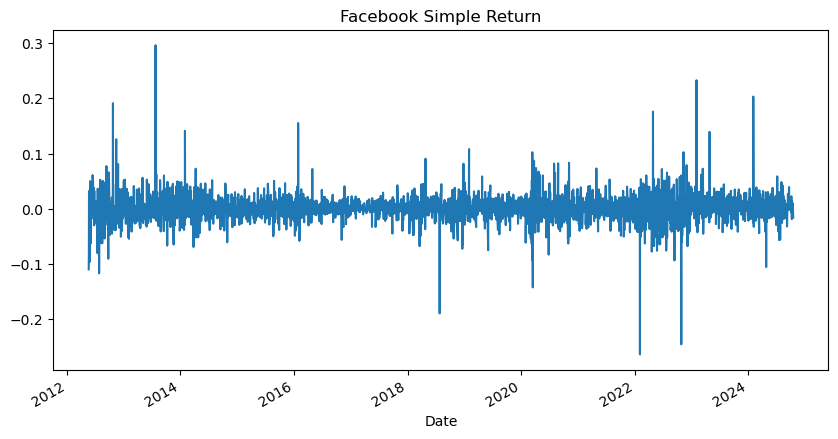

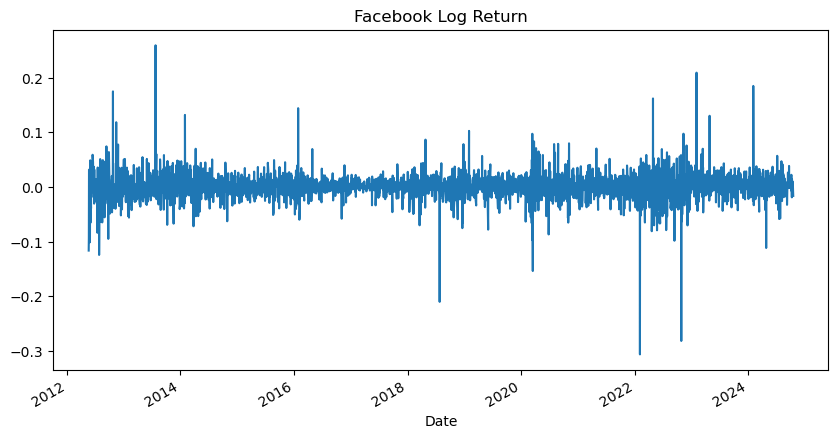

In [18]:
# plot the simple return and log returns for the "facebook" stocks

#definition of simple return 
def simple_return(data):
    simple_return = (data/data.shift(1)) - 1
    return simple_return

#definition of log return 
def log_return(data):
    log_return = np.log(data/data.shift(1))
    return log_return

#plot the simple return and log returns for the stocks
simple_return(facebook_data['Close']).plot(figsize=(10,5))
plt.title('Facebook Simple Return')
plt.show()

log_return(facebook_data['Close']).plot(figsize=(10,5))
plt.title('Facebook Log Return')
plt.show()



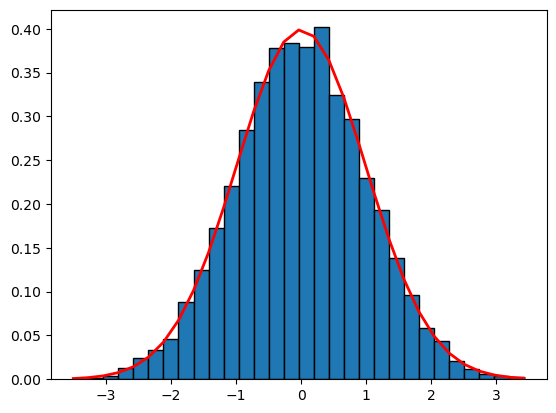

In [15]:
#plot normal distribution using numpy.random.normal
mu = 0
sigma = 1
n = 10000
s = np.random.normal(mu, sigma, n)

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


In [34]:
np.random.normal(loc=0.0, scale=1.0, size=None)

-1.3545602511487838

In [33]:
np.random.normal(3, 2.5, size=(2, 4))

array([[-0.85536893,  4.05102301,  2.48498556,  7.21641739],
       [ 1.07468603,  2.68810356,  1.51115453,  3.53590101]])

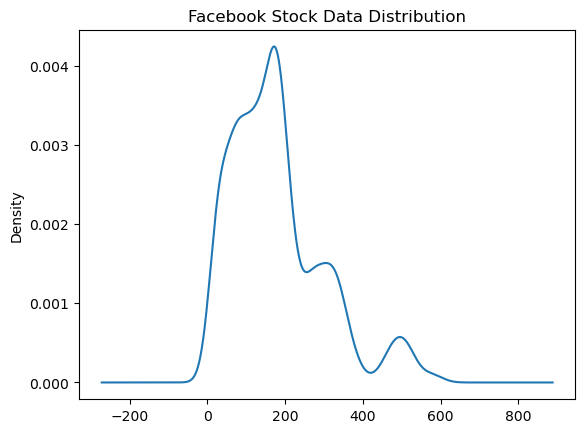

In [31]:
# plot normal distribution of stock data
facebook_data['Open'].plot(kind='kde')
plt.title('Facebook Stock Data Distribution')
plt.show()

                            Open   High    Low  Close    Volume  Dividends  \
Date                                                                         
2019-05-31 00:00:00-04:00 179.74 180.00 176.63 176.94  15226500       0.00   
2019-06-03 00:00:00-04:00 174.47 174.52 160.53 163.66  56059600       0.00   
2019-06-04 00:00:00-04:00 163.22 167.77 160.36 167.00  46044300       0.00   
2019-06-05 00:00:00-04:00 166.98 168.21 164.14 167.67  19758300       0.00   
2019-06-06 00:00:00-04:00 167.79 169.19 166.73 167.82  12446400       0.00   
...                          ...    ...    ...    ...       ...        ...   
2021-01-25 00:00:00-05:00 277.31 279.26 270.69 277.18  19087000       0.00   
2021-01-26 00:00:00-05:00 277.31 284.53 276.98 281.20  19373600       0.00   
2021-01-27 00:00:00-05:00 281.68 282.60 267.32 271.32  35346200       0.00   
2021-01-28 00:00:00-05:00 276.35 285.93 263.91 264.20  37758800       0.00   
2021-01-29 00:00:00-05:00 264.50 265.76 254.09 257.55  30389500 

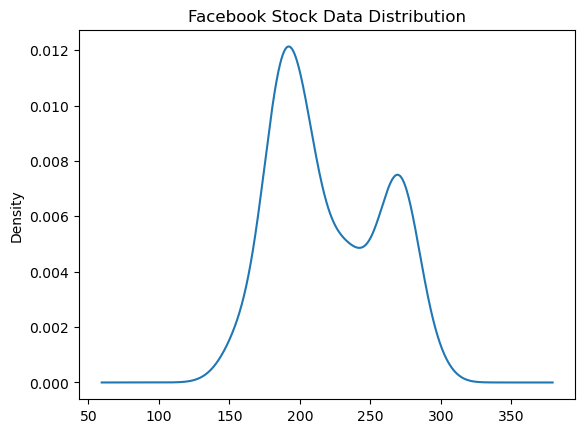

In [32]:
import yfinance as yf  

# in order to specify start date and 
# end date we need datetime package
import datetime

startDate = datetime.datetime(2019, 5, 31)
endDate = datetime.datetime(2021, 1, 30)

# load Meta (Facebook) data
new_facebook = yf.Ticker("META")

facebook_data = new_facebook.history(start=startDate, end=endDate)
print(facebook_data)

facebook_data['Open'].plot(kind='kde')
plt.title('Facebook Stock Data Distribution')
plt.show()


# Reference

https://www.geeksforgeeks.org/get-financial-data-from-yahoo-finance-with-python/
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html